In [91]:
#import kaggle
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
import tensorflow as tf
from tensorflow.keras import utils
import glob
import matplotlib.pyplot as plt
from wordcloud import WordCloud,STOPWORDS ## STOPWORDS는 불용어
import pandas as pd
import json

In [2]:
! kaggle competitions list

ref                                                                                deadline             category             reward  teamCount  userHasEntered  
---------------------------------------------------------------------------------  -------------------  ---------------  ----------  ---------  --------------  
https://www.kaggle.com/competitions/vesuvius-challenge-ink-detection               2023-06-14 23:59:00  Featured         $1,000,000        644           False  
https://www.kaggle.com/competitions/asl-signs                                      2023-05-01 23:59:00  Research           $100,000       1138           False  
https://www.kaggle.com/competitions/tlvmc-parkinsons-freezing-gait-prediction      2023-06-08 23:59:00  Research           $100,000        741           False  
https://www.kaggle.com/competitions/amp-parkinsons-disease-progression-prediction  2023-05-18 23:59:00  Featured            $60,000       1445           False  
https://www.kaggle.com/competition

In [3]:
sent = ("휴일 인 오늘 도 서쪽 을 중심 으로 폭염 이 이어졌는데요, 내일 은 반가운 비 소식 이 있습니다.", 
        "폭염 을 피해서 휴일 에 놀러왔다가 갑작스런 비 로 인해 망연자실 하고 있습니다.") 

display(sent)

('휴일 인 오늘 도 서쪽 을 중심 으로 폭염 이 이어졌는데요, 내일 은 반가운 비 소식 이 있습니다.',
 '폭염 을 피해서 휴일 에 놀러왔다가 갑작스런 비 로 인해 망연자실 하고 있습니다.')

In [4]:
#카운트 백터 ,tfID 벡터,  워드 투 백


In [5]:
vector = TfidfVectorizer()
vector.fit(sent)
vector1=vector.transform(sent)



In [6]:
sent_vect = vector1.toarray()

In [7]:
print(sent_vect[0])## 첫문장 리스트
print(sent_vect[1])## 두번쨰 문장 리스트

[0.         0.32412345 0.         0.         0.32412345 0.32412345
 0.32412345 0.32412345 0.32412345 0.32412345 0.         0.2306165
 0.32412345 0.2306165  0.         0.         0.2306165 ]
[0.36469323 0.         0.36469323 0.36469323 0.         0.
 0.         0.         0.         0.         0.36469323 0.25948224
 0.         0.25948224 0.36469323 0.36469323 0.25948224]


In [8]:
from sklearn.metrics.pairwise import cosine_similarity,euclidean_distances

In [9]:
sent_vect[0:1] ## 1차원을 2차원으로 만드는 방법

array([[0.        , 0.32412345, 0.        , 0.        , 0.32412345,
        0.32412345, 0.32412345, 0.32412345, 0.32412345, 0.32412345,
        0.        , 0.2306165 , 0.32412345, 0.2306165 , 0.        ,
        0.        , 0.2306165 ]])

In [10]:
print(cosine_similarity(sent_vect[0:1],sent_vect[1:2]))## 확률로 나오기 떄문에 각도를 찾아줄 필요가 있음
print(euclidean_distances(sent_vect[0:1],sent_vect[1:2]))

[[0.17952266]]
[[1.28099753]]


In [11]:
import os 
import pandas as pd

In [12]:
data_set = tf.keras.utils.get_file(
fname='imdb.tar.gz',
origin  ="http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz",
    extract = True
)


In [13]:
data = r'C:\Users\ygl\.keras\datasets\aclImdb\train\pos\0_9.txt'
mytxt = np.loadtxt(data, dtype='str',encoding='utf-8',delimiter=':')


In [14]:
fix_path ='C:/Users/ygl/.keras/datasets/aclImdb'
tt_list=['/train','/test']
pn_list=['/pos/','/neg/']
data = {}
for i in tt_list:
    
    for j in pn_list:
        path = fix_path+i+j+"*.*"
        
        data[i+j] = []
        file_list = glob.glob(path)
        
        for k in file_list:
            with open(k, 'rt', encoding='utf-8')as f:
                data[i+j].append(f.read())

    
                
                

In [15]:
data_train_pos =pd.DataFrame(data['/train/pos/'], columns=['review'])
data_train_pos['target'] =1

data_train_neg =pd.DataFrame(data['/train/neg/'], columns=['review'])
data_train_pos['target'] =0
train_df = pd.concat([data_train_pos,data_train_neg],axis=0)

In [16]:
data_test_pos =pd.DataFrame(data['/test/pos/'], columns=['review'])
data_test_pos['target'] =1

data_test_neg =pd.DataFrame(data['/test/neg/'], columns=['review'])
data_test_neg['target'] =0

test_df = pd.concat([data_test_pos,data_test_neg],axis=0)

In [17]:
reviews= train_df['review']





In [18]:
tokenized_reviews=[r.split() for r in reviews]

In [19]:
tokenized_reviews_len = [len(t) for t in tokenized_reviews]
print('단어갯수=' ,tokenized_reviews_len[:10])


tokenized_reviews_eumjeol = [len(e.replace(" ", ""))for e in reviews]
print('음절갯수=',tokenized_reviews_eumjeol[:10])

단어갯수= [140, 428, 147, 124, 120, 171, 108, 340, 436, 324]
음절갯수= [667, 1939, 695, 540, 528, 847, 521, 1845, 2170, 1537]


(array([9.760e+02, 2.310e+03, 7.276e+03, 4.209e+03, 2.588e+03, 1.802e+03,
        1.307e+03, 9.630e+02, 7.840e+02, 5.520e+02, 4.760e+02, 3.490e+02,
        3.060e+02, 2.140e+02, 1.710e+02, 1.620e+02, 1.160e+02, 1.040e+02,
        8.600e+01, 7.300e+01, 7.100e+01, 5.800e+01, 1.800e+01, 8.000e+00,
        2.000e+00, 4.000e+00, 3.000e+00, 1.000e+00, 2.000e+00, 2.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 2.000e+00, 0.000e+00,
        0.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([   43.  ,   266.84,   490.68,   714.52,   938.36,  1162.2 ,
         1386.04,  1609.88,  1833.72,  2057.56,  2281.4 ,  2505.24,
         2729.08,  2952.92,  3176.76,  3400.6 ,  3624.44,  3848.28,
         4072.12,  4295.96,  4519.8 ,  4743.64,  4967.48,  5191.32,
         5415.16,  5639.  ,  5862.84,  6086.68,  6310.52,  6534.36,
         6758.2 ,  6982.04,  7205.88

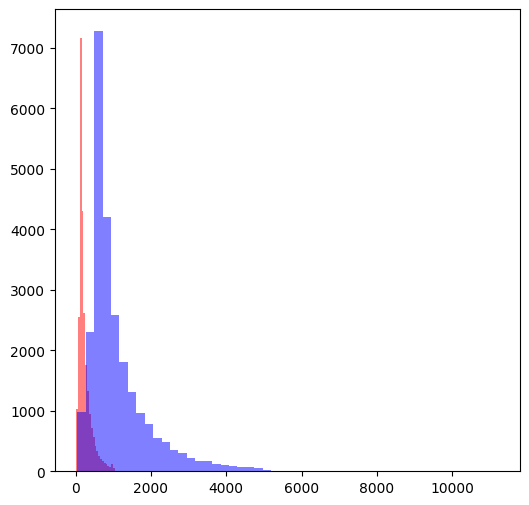

In [20]:
plt.figure(figsize=(6,6))

plt.hist(tokenized_reviews_len, bins = 50 ,color ='r', alpha=0.5)
plt.hist(tokenized_reviews_eumjeol, bins = 50, color='b',alpha=0.5)

In [21]:
def summary_token(x):
    print('문장의 최대길이:{}'.format(np.max(x)))
    print('문장의 최소길이:{}'.format(np.min(x)))
    print('문장의 평균길이:{}'.format(np.mean(x)))
    print('문장의 중앙값길이:{}'.format(np.median(x)))
    print('문장의 1사분위길이:{}'.format(np.percentile(x,25)))
    print('문장의 3사분위길이:{}'.format(np.percentile(x,75)))

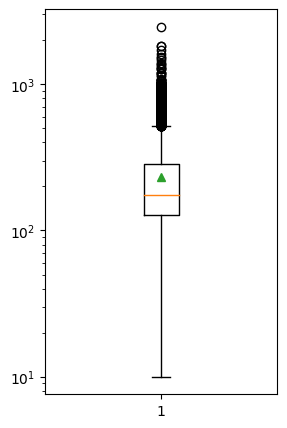

In [22]:
plt.figure(figsize=(3,5))
plt.boxplot(tokenized_reviews_len, showmeans=True)
plt.yscale('log')

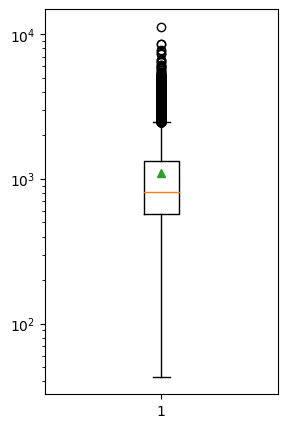

In [23]:
plt.figure(figsize=(3,5))
plt.boxplot(tokenized_reviews_eumjeol, showmeans=True)
plt.yscale('log')

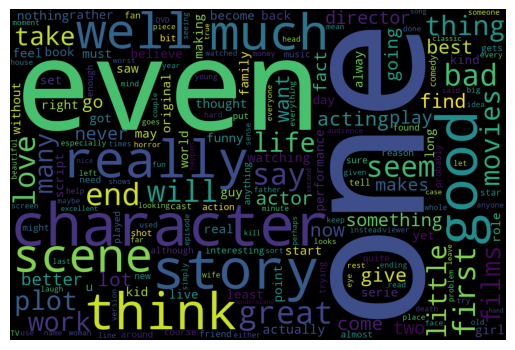

In [24]:
MYSTOPWORD = list(STOPWORDS)+ ['br','show','look','film','made','seen','watch','part','man','turn','another','though','still','come'
                              'going','movie','see','make','know','people','way','time']
MYSTOPWORD = set(MYSTOPWORD)
wordcloud = WordCloud(stopwords=MYSTOPWORD, width = 1200, height=800)

wordcloud.generate(" ".join(reviews))
plt.figure()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [25]:
import seaborn as sns

<Axes: xlabel='target', ylabel='count'>

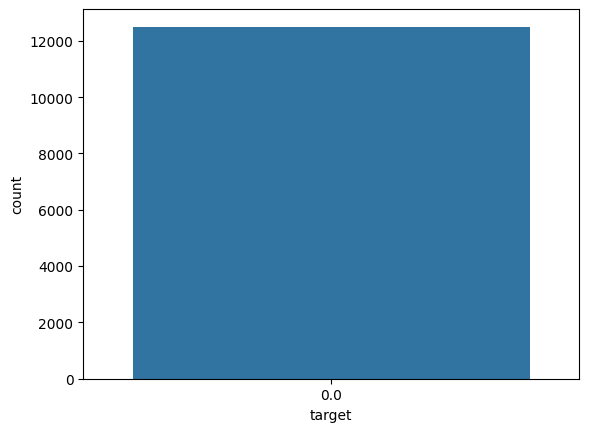

In [26]:
sns.countplot(x='target', data =train_df)

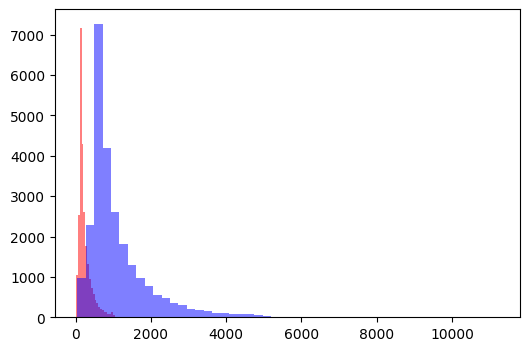

In [27]:
train_df = pd.read_csv('./datain/labeledTrain_Data.tsv', header=0, delimiter ='\t',quoting=3)
reviews = train_df['review']
tokenize_reivews_word =[len(r.split()) for r in reviews]
tokenize_reivews_char = [len(s.replace(" ",""))for s in reviews]
plt.figure(figsize = (6,4))
plt.hist(tokenize_reivews_word, bins=50, color='r',alpha =0.5)
plt.hist(tokenize_reivews_char, bins=50, color= 'b', alpha=0.5)
def summary_token(x):
    print('문장의 최대길이:{}'.format(np.max(x)))
    print('문장의 최소길이:{}'.format(np.min(x)))
    print('문장의 평균길이:{}'.format(np.mean(x)))
    print('문장의 중앙값길이:{}'.format(np.median(x)))
    print('문장의 1사분위길이:{}'.format(np.percentile(x,25)))
    print('문장의 3사분위길이:{}'.format(np.percentile(x,75)))
    summary_token(tokenize_reivews_word)

In [28]:
reviews[0]

'"With all this stuff going down at the moment with MJ i\'ve started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ\'s feeling towards the press and also the obvious message of drugs are bad m\'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.<br /><br />The actual feature film bit when it finally

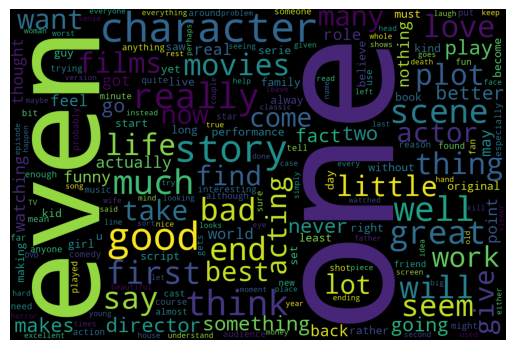

In [29]:
MYSTOPWORD = list(STOPWORDS)+ ['br','show','look','film','made','seen','watch','part','man','turn','another','though','still','come'
                              'going','movie','see','make','know','people','way','time']
MYSTOPWORD = set(MYSTOPWORD)
wordcloud = WordCloud(stopwords=MYSTOPWORD, width = 1200, height=800)

wordcloud.generate(" ".join(reviews))
plt.figure()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [30]:
df = pd.DataFrame([[1,2],[3,4]], columns=['A','B'])
def add_one(x):
    x+=1
    return x
df['A'].apply(add_one) ## pandas의 메소드를 이용하는 방식
df['A'].apply(lambda x : x+1) ## 파이썬의 built in 함수를 사용하는 방식


0    2
1    4
Name: A, dtype: int64

In [59]:
train_df

,id,sentiment,review
0,"""5814_8""",1,"""With all this stuff going down at the moment ..."
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ..."
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell..."
3,"""3630_4""",0,"""It must be assumed that those who praised thi..."
4,"""9495_8""",1,"""Superbly trashy and wondrously unpretentious ..."
...,...,...,...
24995,"""3453_3""",0,"""It seems like more consideration has gone int..."
24996,"""5064_1""",0,"""I don't believe they made this film. Complete..."
24997,"""10905_3""",0,"""Guy is a loser. Can't get girls, needs to bui..."
24998,"""10194_3""",0,"""This 30 minute documentary Buñuel made in the..."


In [31]:
'?' in train_df['review'][0]

True

In [32]:
qmark =np.mean(train_df['review'].apply(lambda x: '?' in x))
fullstop = np.mean(train_df['review'].apply(lambda x: '.'in x))
captial_first = np.mean(train_df['review'].apply (lambda x : x[1].isupper()))
captial =np.mean(train_df['review'].apply (lambda x : max([y.isupper() for y in x])))
numbers = np.mean(train_df['review'].apply (lambda x : max([y.isdigit() for y in x])))
print('물음표가 있는 질문:{:.2f}%', format(qmark*100))

물음표가 있는 질문:{:.2f}% 29.552


In [40]:
import re
import json
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
import nltk

In [34]:
html_text = \
'''
<p> O’er all the hilltops<br>
    Is quiet now,<br>
    In all the treetops<br>
    Hearest thou<br>
    Hardly a breath;<br>
    The birds are asleep in the trees:<br>
    Wait, soon like these<br>
    Thou too shalt rest.
</p>
'''

In [35]:
html_text_soup = BeautifulSoup(html_text,'html').get_text()
re.sub('[^a-zA-z]',' ',html_text_soup)

' O er all the hilltops     Is quiet now      In all the treetops     Hearest thou     Hardly a breath      The birds are asleep in the trees      Wait  soon like these     Thou too shalt rest   '

In [36]:
review = train_df['review'][0]

review_text =BeautifulSoup(review,'html').get_text()

In [37]:
review_text = re.sub('[^a-zA-Z]', " ", review_text)
display(review_text)

' With all this stuff going down at the moment with MJ i ve started listening to his music  watching the odd documentary here and there  watched The Wiz and watched Moonwalker again  Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent  Moonwalker is part biography  part feature film which i remember going to see at the cinema when it was originally released  Some of it has subtle messages about MJ s feeling towards the press and also the obvious message of drugs are bad m kay Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring  Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him The actual feature film bit when it finally starts is only on for    m

In [52]:
len(stopwords.words('english'))
stop_word = set(stopwords.words('english'))
review_text = review_text.lower()

In [54]:
splitted_words =review_text.split()

words = [w for w in splitted_words if w not in stop_word]

clean_review = ' '.join(words)
clean_review

'stuff going moment mj started listening music watching odd documentary watched wiz watched moonwalker maybe want get certain insight guy thought really cool eighties maybe make mind whether guilty innocent moonwalker part biography part feature film remember going see cinema originally released subtle messages mj feeling towards press also obvious message drugs bad kay visually impressive course michael jackson unless remotely like mj anyway going hate find boring may call mj egotist consenting making movie mj fans would say made fans true really nice actual feature film bit finally starts minutes excluding smooth criminal sequence joe pesci convincing psychopathic powerful drug lord wants mj dead bad beyond mj overheard plans nah joe pesci character ranted wanted people know supplying drugs etc dunno maybe hates mj music lots cool things like mj turning car robot whole speed demon sequence also director must patience saint came filming kiddy bad sequence usually directors hate workin

In [55]:
def preprocessing(review,remove_stopwords = False):
    
    review_text = BeautifulSoup(review, 'html').get_text()  ## html 제거
    
    review_text =re.sub('[^a-zA-z]',' ',review_text)## 특수문자 제거
    
    words =review_text.lower().split() #소문자로 만든 후에 스플릿 하기
    
    if remove_stopwords:
        stops = set(stopwords.words('english'))
        
        words = [w for w in words if w not in stops]
        
        clean_review = ' '.join(words)
    
    else:
        clean_review = ''.join(words)
        
    return clean_review
    
    
    
    

In [72]:
clean_train_reviews = []
for review in train_df['review']:
    clean_train_reviews.append(preprocessing(review, remove_stopwords=True))
    
len(clean_train_reviews)

C:\Users\ygl\anaconda3\envs\py3.8\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


25000

In [71]:
clean_train_reviews.keys()

dict_keys(['review', 'sentiment'])

In [73]:
clean_train_reviews = {
    'review': clean_train_reviews,
    'sentiment':train_df['sentiment']}
clean_train_df = pd.DataFrame(clean_train_reviews)
clean_train_df.head()

,review,sentiment
0,stuff going moment mj started listening music ...,1
1,\ classic war worlds\ timothy hines entertaini...,1
2,film starts manager nicholas bell giving welco...,0
3,must assumed praised film \ greatest filmed op...,0
4,superbly trashy wondrously unpretentious explo...,1


In [121]:
tokenizer =tf.keras.preprocessing.text.Tokenizer()

tokenizer.fit_on_texts(clean_train_df['review'])
text_sequences = tokenizer.texts_to_sequences(clean_train_df['review']) 
tokenizer.word_index

{'movie': 1,
 'film': 2,
 'one': 3,
 'like': 4,
 'good': 5,
 'time': 6,
 'even': 7,
 'would': 8,
 'story': 9,
 'really': 10,
 'see': 11,
 'well': 12,
 'much': 13,
 'get': 14,
 'bad': 15,
 'people': 16,
 'also': 17,
 'first': 18,
 'great': 19,
 'made': 20,
 'way': 21,
 'make': 22,
 'could': 23,
 'movies': 24,
 'think': 25,
 'characters': 26,
 'character': 27,
 'watch': 28,
 'two': 29,
 'films': 30,
 'seen': 31,
 'many': 32,
 'life': 33,
 'plot': 34,
 'acting': 35,
 'never': 36,
 'love': 37,
 'little': 38,
 'best': 39,
 'show': 40,
 'know': 41,
 'ever': 42,
 'man': 43,
 'better': 44,
 'end': 45,
 'still': 46,
 'say': 47,
 'scene': 48,
 'scenes': 49,
 'go': 50,
 'something': 51,
 'back': 52,
 'real': 53,
 'watching': 54,
 'though': 55,
 'thing': 56,
 'old': 57,
 'years': 58,
 'actors': 59,
 'director': 60,
 'work': 61,
 'another': 62,
 'new': 63,
 'nothing': 64,
 'funny': 65,
 'actually': 66,
 'makes': 67,
 'look': 68,
 'find': 69,
 'going': 70,
 'part': 71,
 'lot': 72,
 'every': 73,
 'wo

In [78]:
vocab_word = tokenizer.word_index
vocab_word['<PAD>'] = 0


In [82]:
data_cofigs = {}
data_cofigs['vocab'] = vocab_word
data_cofigs['vocab_size'] = len(vocab_word)
print(data_cofigs.keys())

dict_keys(['vocab', 'vocab_size'])


AttributeError: 'dict' object has no attribute 'type'

In [86]:
train_inputs = tf.keras.preprocessing.sequence.pad_sequences(
    text_sequences, maxlen =174,padding='pre', truncating='pre'
)

print(train_inputs.shape)

(25000, 174)


In [88]:
train_label =train_df['sentiment']

In [94]:
np.save('./datain/train_input.npy', train_inputs)
np.save('./datain/train_lable.npy', train_label)

json.dump(data_cofigs, open('./datain/data_configs.json', 'w'),ensure_ascii=False )

(array([8.330e+02, 2.216e+03, 6.793e+03, 4.456e+03, 2.894e+03, 1.808e+03,
        1.372e+03, 9.950e+02, 8.010e+02, 5.770e+02, 4.470e+02, 3.630e+02,
        3.050e+02, 2.120e+02, 1.910e+02, 1.480e+02, 1.170e+02, 9.700e+01,
        9.300e+01, 7.100e+01, 7.500e+01, 6.400e+01, 4.500e+01, 1.500e+01,
        5.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 2.000e+00]),
 array([   29. ,   246.2,   463.4,   680.6,   897.8,  1115. ,  1332.2,
         1549.4,  1766.6,  1983.8,  2201. ,  2418.2,  2635.4,  2852.6,
         3069.8,  3287. ,  3504.2,  3721.4,  3938.6,  4155.8,  4373. ,
         4590.2,  4807.4,  5024.6,  5241.8,  5459. ,  5676.2,  5893.4,
         6110.6,  6327.8,  6545. ,  6762.2,  6979.4,  7196.6,  7413.8,
         7631. ,  784

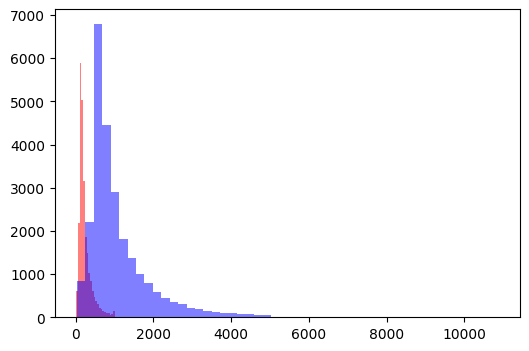

In [115]:
test_df = pd.read_csv('./datain/test_Data.tsv', header=0, delimiter ='\t',quoting=3)
reviews = test_df['review']
tokenize_reivews_word =[len(r.split()) for r in reviews]
tokenize_reivews_char = [len(s.replace(" ",""))for s in reviews]
plt.figure(figsize = (6,4))
plt.hist(tokenize_reivews_word, bins=50, color='r',alpha =0.5)
plt.hist(tokenize_reivews_char, bins=50, color= 'b', alpha=0.5)


In [109]:
clean_test_reviews = []
for review in test_df['review']:
    clean_test_reviews.append(preprocessing(review, remove_stopwords=True))
    
len(clean_test_reviews)

C:\Users\ygl\anaconda3\envs\py3.8\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


25000

In [110]:
clean_test_df = pd.DataFrame(clean_test_reviews, columns=['review'])

In [111]:
tokenizer.fit_on_texts(clean_test_df['review'])
text_sequences = tokenizer.texts_to_sequences(clean_test_df['review']) 
tokenizer.word_index

{'movie': 1,
 'film': 2,
 'one': 3,
 'like': 4,
 'good': 5,
 'time': 6,
 'even': 7,
 'would': 8,
 'story': 9,
 'really': 10,
 'see': 11,
 'well': 12,
 'much': 13,
 'bad': 14,
 'get': 15,
 'people': 16,
 'great': 17,
 'also': 18,
 'first': 19,
 'made': 20,
 'make': 21,
 'way': 22,
 'could': 23,
 'movies': 24,
 'characters': 25,
 'think': 26,
 'watch': 27,
 'character': 28,
 'films': 29,
 'two': 30,
 'many': 31,
 'seen': 32,
 'love': 33,
 'never': 34,
 'plot': 35,
 'life': 36,
 'acting': 37,
 'show': 38,
 'best': 39,
 'know': 40,
 'little': 41,
 'ever': 42,
 'man': 43,
 'better': 44,
 'end': 45,
 'scene': 46,
 'still': 47,
 'say': 48,
 'scenes': 49,
 'something': 50,
 'go': 51,
 'back': 52,
 'real': 53,
 'thing': 54,
 'watching': 55,
 'actors': 56,
 'director': 57,
 'years': 58,
 'funny': 59,
 'though': 60,
 'old': 61,
 'another': 62,
 'work': 63,
 'actually': 64,
 'nothing': 65,
 'makes': 66,
 'look': 67,
 'find': 68,
 'going': 69,
 'new': 70,
 'lot': 71,
 'every': 72,
 'part': 73,
 'wo

In [112]:
vocab_word = tokenizer.word_index
vocab_word['<PAD>'] = 0
data_cofigs = {}
data_cofigs['vocab'] = vocab_word
data_cofigs['vocab_size'] = len(vocab_word)
print(data_cofigs.keys())

dict_keys(['vocab', 'vocab_size'])


In [113]:
test_inputs = tf.keras.preprocessing.sequence.pad_sequences(
    text_sequences, maxlen =174,padding='pre', truncating='pre'
)

print(test_inputs.shape)

(25000, 174)


In [114]:
np.save('./datain/test_input.npy', test_inputs)
json.dump(data_cofigs, open('./datain/data_test_configs.json', 'w'),ensure_ascii=False )

FileNotFoundError: [Errno 2] No such file or directory: './datain/train_label.npy'

In [120]:
test_df = pd.read_csv('./datain/test_Data.tsv', header=0, delimiter ='\t',quoting=3)
clean_test_reviews = []
for i in test_df['review']:
    clean_test_reviews.append(preprocessing(i, remove_stopwords=True))

C:\Users\ygl\anaconda3\envs\py3.8\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


In [137]:
test_vect = tokenizer.texts_to_sequences(clean_test_reviews)
test_sequences =tf.keras.preprocessing.sequence.pad_sequences(test_vect, maxlen=174, padding='pre', truncating='pre')

test_id = test_df['id'].str.replace('"','')

In [138]:
np.save('./datain/test_input.npy', test_sequences)
np.save('./datain/test_id.npy', test_id)

In [139]:
test_dict = {
    'review' : clean_test_reviews,
    'id' : test_id
}



clean_test_df =pd.DataFrame(test_dict)

In [140]:
clean_test_df.to_csv('./datain/test_clean.csv', index=False)

In [142]:
clean_train_df.to_csv('./datain/clean_train.csv', index=False)

In [143]:
## Logistic regression
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [144]:
DATA_IN_PATH = './datain/'
DATA_OUT_PATH = './dataout/'


In [146]:
train_data =pd.read_csv('./datain/clean_train.csv', header=0)
train_data.head()

,review,sentiment
0,stuff going moment mj started listening music ...,1
1,\ classic war worlds\ timothy hines entertaini...,1
2,film starts manager nicholas bell giving welco...,0
3,must assumed praised film \ greatest filmed op...,0
4,superbly trashy wondrously unpretentious explo...,1


In [148]:
reviews= train_data['review']
target = train_data['sentiment']

In [154]:
tfidf = TfidfVectorizer(analyzer='char', min_df=0,ngram_range=(1,3), max_features=5000)
tfidf.fit(reviews)

X= tfidf.transform(reviews)
y= np.array(target)

In [158]:
X.toarray().shape

(25000, 5000)

In [160]:
tfidf.vocabulary_.keys()

dict_keys(['s', 't', 'u', 'f', ' ', 'g', 'o', 'i', 'n', 'm', 'e', 'j', 'a', 'r', 'd', 'l', 'c', 'w', 'h', 'y', 'z', 'k', 'b', 'p', 'v', 'x', 'q', 'st', 'tu', 'uf', 'ff', 'f ', ' g', 'go', 'oi', 'in', 'ng', 'g ', ' m', 'mo', 'om', 'me', 'en', 'nt', 't ', 'j ', ' s', 'ta', 'ar', 'rt', 'te', 'ed', 'd ', ' l', 'li', 'is', 'ni', 'mu', 'us', 'si', 'ic', 'c ', ' w', 'wa', 'at', 'tc', 'ch', 'hi', ' o', 'od', 'dd', ' d', 'do', 'oc', 'cu', 'um', 'ry', 'y ', 'he', 'wi', 'iz', 'z ', 'oo', 'on', 'nw', 'al', 'lk', 'ke', 'er', 'r ', 'ma', 'ay', 'yb', 'be', 'e ', 'an', 'ge', 'et', ' c', 'ce', 'ai', 'n ', ' i', 'ns', 'ig', 'gh', 'ht', 'gu', 'uy', ' t', 'th', 'ho', 'ou', 'ug', ' r', 're', 'ea', 'll', 'ly', 'co', 'ol', 'l ', ' e', 'ei', 'ti', 'ie', 'es', 's ', 'ak', 'mi', 'nd', 'wh', 'ui', 'il', 'lt', 'ty', 'nn', 'no', ' p', 'pa', ' b', 'bi', 'io', 'og', 'gr', 'ra', 'ap', 'ph', 'hy', ' f', 'fe', 'ur', 'fi', 'lm', 'm ', 'em', 'mb', 'se', 'ee', 'ci', 'ne', 'a ', 'or', 'ri', 'gi', 'na', 'el', 'le', 'as', 's

In [161]:
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.2)

In [165]:
from sklearn.model_selection import cross_validate

In [166]:
reg =LogisticRegression(max_iter=1000)

reg.fit(X_train,y_train)



LogisticRegression(max_iter=1000)

In [167]:
score = cross_validate(reg,X_train,y_train, cv=5)

print(score)

{'fit_time': array([2.54179502, 1.19285178, 2.91870236, 2.37637401, 2.52301025]), 'score_time': array([0.0071485 , 0.00812888, 0.00715065, 0.00710797, 0.0071559 ]), 'test_score': array([0.825  , 0.82325, 0.82325, 0.83725, 0.82225])}


In [169]:
print(np.mean(score['test_score']))

0.8262


In [171]:
reg.score(X_test,y_test)

0.8364

In [173]:
test_df =pd.read_csv('./datain/test_clean.csv', header=0, sep =',')

,review,id
0,naturally film main themes mortality nostalgia...,12311_10
1,movie disaster within disaster film full great...,8348_2
2,movie kids saw tonight child loved one point k...,5828_4
3,afraid dark left impression several different ...,7186_2
4,accurate depiction small time mob life filmed ...,12128_7


In [176]:
test_vect =tfidf.transform(test_df['review'])
test_vect.shape

(25000, 5000)

In [178]:
test_predict =reg.predict(test_vect)

In [179]:
answer_dict = {
    'id':test_df['id'],
    'sentiment':test_predict

    
}

In [184]:
submit=pd.DataFrame(answer_dict)
submit.to_csv('./dataout/reg_tfidf.csv',  index=False)